In [76]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

In [77]:
np.set_printoptions(precision = 3)

pd.set_option("precision", 3)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

In [78]:
%matplotlib inline

In [79]:
USD_EUR = pdr.get_data_fred("DEXUSEU",
                            start = dt.datetime(2010, 10, 1),
                            end = dt.datetime(2021, 9, 30)
                            ).dropna()
USD_EUR

,DEXUSEU
DATE,
2010-10-01,1.375
2010-10-04,1.369
2010-10-05,1.383
2010-10-06,1.392
2010-10-07,1.392
...,...
2021-09-24,1.171
2021-09-27,1.170
2021-09-28,1.168


In [80]:
USD_EUR.rename(columns = {"DEXUSEU": "PRICE"},
               inplace = True)

In [81]:
USD_EUR

,PRICE
DATE,
2010-10-01,1.375
2010-10-04,1.369
2010-10-05,1.383
2010-10-06,1.392
2010-10-07,1.392
...,...
2021-09-24,1.171
2021-09-27,1.170
2021-09-28,1.168


In [82]:
LAGS = 5

COLS = []

In [83]:
for LAG in range(1, LAGS + 1):
    COL = f"lag_{LAG}"
    USD_EUR[COL] = USD_EUR["PRICE"].shift(LAG)
    COLS.append(COL)

In [84]:
USD_EUR

,PRICE,lag_1,lag_2,lag_3,lag_4,lag_5
DATE,,,,,,
2010-10-01,1.375,NaN,NaN,NaN,NaN,NaN
2010-10-04,1.369,1.375,NaN,NaN,NaN,NaN
2010-10-05,1.383,1.369,1.375,NaN,NaN,NaN
2010-10-06,1.392,1.383,1.369,1.375,NaN,NaN
2010-10-07,1.392,1.392,1.383,1.369,1.375,NaN
...,...,...,...,...,...,...
2021-09-24,1.171,1.173,1.174,1.172,1.173,1.173
2021-09-27,1.170,1.171,1.173,1.174,1.172,1.173
2021-09-28,1.168,1.170,1.171,1.173,1.174,1.172


In [85]:
USD_EUR.dropna(inplace = True)

In [86]:
OLS = np.linalg.lstsq(USD_EUR[COLS],
                     USD_EUR["PRICE"],
                     rcond = None)[0]

OLS

array([ 1.023, -0.032,  0.001, -0.01 ,  0.018])

In [87]:
USD_EUR["PREDICTION"] = np.dot(USD_EUR[COLS], 
                               OLS)

USD_EUR

,PRICE,lag_1,lag_2,lag_3,lag_4,lag_5,PREDICTION
DATE,,,,,,,
2010-10-08,1.392,1.392,1.392,1.383,1.369,1.375,1.392
2010-10-12,1.385,1.392,1.392,1.392,1.383,1.369,1.392
2010-10-13,1.396,1.385,1.392,1.392,1.392,1.383,1.384
2010-10-14,1.407,1.396,1.385,1.392,1.392,1.392,1.397
2010-10-15,1.400,1.407,1.396,1.385,1.392,1.392,1.407
...,...,...,...,...,...,...,...
2021-09-24,1.171,1.173,1.174,1.172,1.173,1.173,1.173
2021-09-27,1.170,1.171,1.173,1.174,1.172,1.173,1.171
2021-09-28,1.168,1.170,1.171,1.173,1.174,1.172,1.170


<AxesSubplot:xlabel='DATE'>

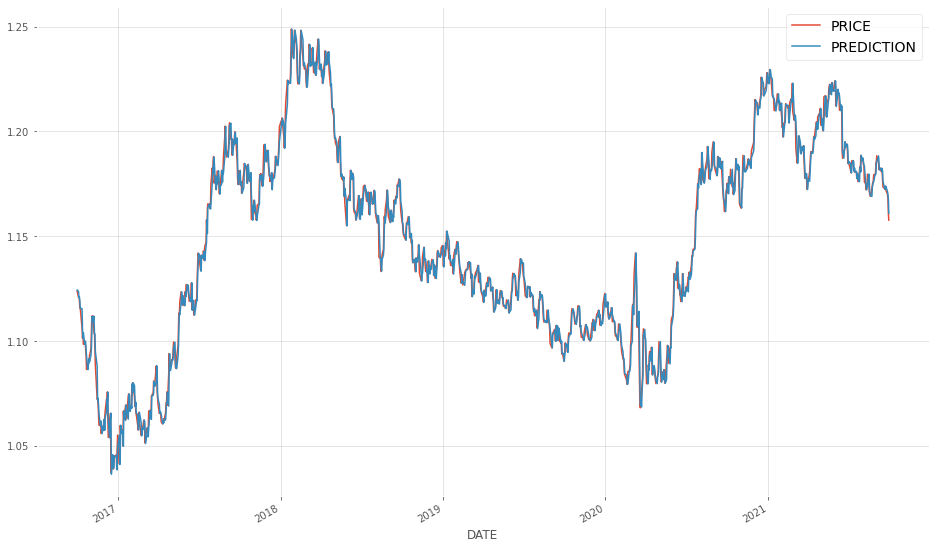

In [88]:
USD_EUR[["PRICE", "PREDICTION"]].loc["2016-9-30":].plot(figsize = (16,10)                                       )

In [89]:
USD_EUR["RETURN"] = np.log(USD_EUR["PRICE"] /
                           USD_EUR["PRICE"].shift(1)
                           )

USD_EUR.dropna(inplace = True)

In [90]:
COLS = []

In [91]:
for LAG in range(1, LAGS + 1):
    COL = f"lag_{LAG}"
    USD_EUR[COL] = USD_EUR["RETURN"].shift(LAG)
    COLS.append(COL)

In [92]:
USD_EUR.dropna(inplace = True)

In [93]:
OLS = np.linalg.lstsq(USD_EUR[COLS],
                      USD_EUR["RETURN"],
                      rcond = None)[0]

OLS

array([ 0.022, -0.004, -0.011, -0.015, -0.025])

In [94]:
USD_EUR["PREDICTION"] = np.dot(USD_EUR[COLS],
                               OLS)

USD_EUR

,PRICE,lag_1,lag_2,lag_3,lag_4,lag_5,PREDICTION,RETURN
DATE,,,,,,,,
2010-10-19,1.383,-0.001,-0.005,0.007,0.008,-0.006,-0.000,-0.011
2010-10-20,1.395,-0.011,-0.001,-0.005,0.007,0.008,-0.001,0.009
2010-10-21,1.397,0.009,-0.011,-0.001,-0.005,0.007,0.000,0.002
2010-10-22,1.390,0.002,0.009,-0.011,-0.001,-0.005,0.000,-0.005
2010-10-25,1.399,-0.005,0.002,0.009,-0.011,-0.001,-0.000,0.006
...,...,...,...,...,...,...,...,...
2021-09-24,1.171,-0.000,0.001,-0.000,-0.000,-0.003,0.000,-0.002
2021-09-27,1.170,-0.002,-0.000,0.001,-0.000,-0.000,-0.000,-0.001
2021-09-28,1.168,-0.001,-0.002,-0.000,0.001,-0.000,-0.000,-0.002


<AxesSubplot:xlabel='DATE'>

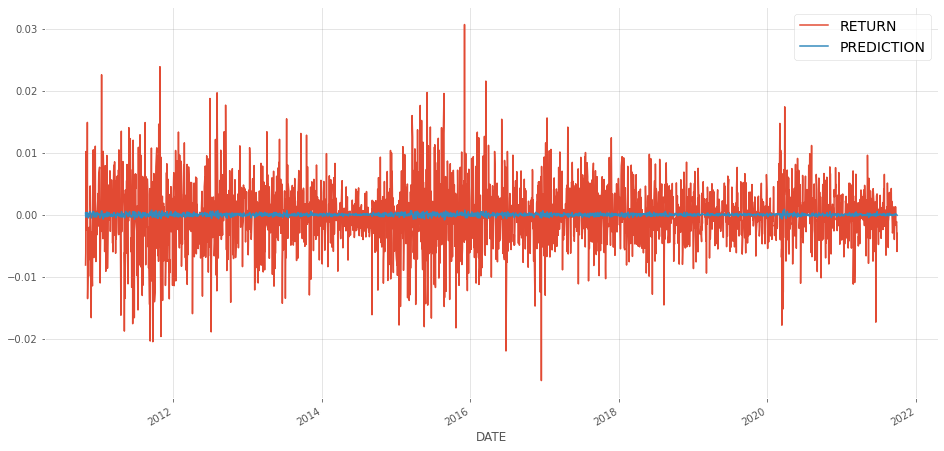

In [95]:
USD_EUR[["RETURN", "PREDICTION"]].iloc[LAGS:].plot(figsize = (16, 8)
                                                   )

In [96]:
ACCURACY = np.sign(USD_EUR["RETURN"] *
                   USD_EUR["PREDICTION"]).value_counts()

In [97]:
ACCURACY

1.000     1395
-1.000    1320
0.000       25
dtype: int64

In [98]:
ACCURACY.values[0] / sum(ACCURACY)

0.5091240875912408

In [99]:
REGRESSION = np.linalg.lstsq(USD_EUR[COLS],
                              np.sign(USD_EUR["RETURN"]),
                             rcond = None)[0]
REGRESSION

array([-0.913, -7.847, -1.048, -7.216, -5.224])

In [100]:
USD_EUR["PREDICTION"] = np.sign(np.dot(USD_EUR[COLS],
                                      REGRESSION)
                               )

USD_EUR["PREDICTION"].value_counts()

1.000     1387
-1.000    1353
Name: PREDICTION, dtype: int64

In [101]:
HIT_RATIO = np.sign(USD_EUR["RETURN"] *    
                    USD_EUR["PREDICTION"]).value_counts()

HIT_RATIO

1.000     1407
-1.000    1308
0.000       25
dtype: int64

In [102]:
HIT_RATIO.values[0] / sum(HIT_RATIO)

0.5135036496350365

In [103]:
USD_EUR

,PRICE,lag_1,lag_2,lag_3,lag_4,lag_5,PREDICTION,RETURN
DATE,,,,,,,,
2010-10-19,1.383,-0.001,-0.005,0.007,0.008,-0.006,-1.000,-0.011
2010-10-20,1.395,-0.011,-0.001,-0.005,0.007,0.008,-1.000,0.009
2010-10-21,1.397,0.009,-0.011,-0.001,-0.005,0.007,1.000,0.002
2010-10-22,1.390,0.002,0.009,-0.011,-0.001,-0.005,-1.000,-0.005
2010-10-25,1.399,-0.005,0.002,0.009,-0.011,-0.001,1.000,0.006
...,...,...,...,...,...,...,...,...
2021-09-24,1.171,-0.000,0.001,-0.000,-0.000,-0.003,1.000,-0.002
2021-09-27,1.170,-0.002,-0.000,0.001,-0.000,-0.000,1.000,-0.001
2021-09-28,1.168,-0.001,-0.002,-0.000,0.001,-0.000,1.000,-0.002


In [104]:
USD_EUR["STRATEGY"] = USD_EUR["PREDICTION"] * USD_EUR["RETURN"]
USD_EUR

,PRICE,lag_1,lag_2,lag_3,lag_4,lag_5,PREDICTION,RETURN,STRATEGY
DATE,,,,,,,,,
2010-10-19,1.383,-0.001,-0.005,0.007,0.008,-0.006,-1.000,-0.011,0.011
2010-10-20,1.395,-0.011,-0.001,-0.005,0.007,0.008,-1.000,0.009,-0.009
2010-10-21,1.397,0.009,-0.011,-0.001,-0.005,0.007,1.000,0.002,0.002
2010-10-22,1.390,0.002,0.009,-0.011,-0.001,-0.005,-1.000,-0.005,0.005
2010-10-25,1.399,-0.005,0.002,0.009,-0.011,-0.001,1.000,0.006,0.006
...,...,...,...,...,...,...,...,...,...
2021-09-24,1.171,-0.000,0.001,-0.000,-0.000,-0.003,1.000,-0.002,-0.002
2021-09-27,1.170,-0.002,-0.000,0.001,-0.000,-0.000,1.000,-0.001,-0.001
2021-09-28,1.168,-0.001,-0.002,-0.000,0.001,-0.000,1.000,-0.002,-0.002


In [105]:
USD_EUR[["RETURN", "STRATEGY"]].sum().apply(np.exp)

RETURN     0.828
STRATEGY   1.217
dtype: float64

<AxesSubplot:xlabel='DATE'>

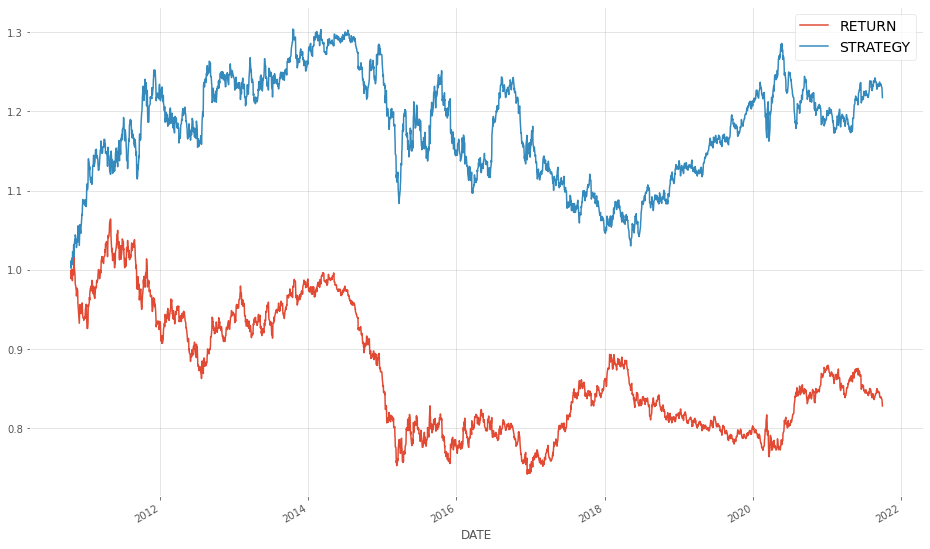

In [106]:
USD_EUR[["RETURN", "STRATEGY"]
        ].dropna().cumsum().apply(np.exp).plot(figsize = (16,10)
                                              )

In [107]:
from sklearn import linear_model

In [108]:
GOLD = pdr.get_data_yahoo("GLD", 
                          start = dt.datetime(2010, 10, 1),
                          end = dt.datetime(2021, 9, 30)
                         )

GOLD

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-09-30,128.280,126.610,128.150,127.910,19213400,127.910
2010-10-01,129.070,127.910,127.910,128.910,17211900,128.910
2010-10-04,128.620,128.220,128.520,128.460,8368000,128.460
2010-10-05,131.120,129.870,130.110,130.990,17489600,130.990
2010-10-06,131.860,131.340,131.450,131.810,16142200,131.810
...,...,...,...,...,...,...
2021-09-24,164.000,162.740,163.000,163.300,6937500,163.300
2021-09-27,164.360,163.510,163.850,163.640,4943000,163.640
2021-09-28,162.820,161.730,162.730,162.050,9282800,162.050


In [109]:
GOLD["RETURN"] = np.log(GOLD["Close"] / GOLD["Close"].shift(1)
                        )
GOLD.dropna(inplace = True)

In [110]:
lags = 3

cols = []

for lag in range(1, lags +1):
    col = "lag_{}".format(lag)
    GOLD[col] = GOLD["RETURN"].shift(lag)
    cols.append(col)
    
GOLD.dropna(inplace = True)

In [111]:
M = linear_model.LogisticRegression(solver = "lbfgs",
                                    C = 1e7,
                                    multi_class = "auto",
                                    max_iter = 10000)

In [112]:
M.fit(GOLD[cols],
     np.sign(GOLD["RETURN"]
            )
     )

LogisticRegression(C=10000000.0, max_iter=10000)

In [113]:
GOLD["PREDICTION"] = M.predict(GOLD[cols]
                               )

In [114]:
GOLD["PREDICTION"].value_counts()

1.000     2569
-1.000     197
Name: PREDICTION, dtype: int64

In [115]:
accuracy = np.sign(GOLD["RETURN"].iloc[lags:] * 
                   GOLD["PREDICTION"].iloc[lags:]
                  ).value_counts()
accuracy

1.000     1443
-1.000    1309
0.000       11
dtype: int64

In [116]:
GOLD["STRATEGY"] = GOLD["PREDICTION"] * GOLD["RETURN"]

GOLD[["RETURN", "STRATEGY"]].sum().apply(np.exp)

RETURN     1.254
STRATEGY   1.258
dtype: float64

<AxesSubplot:xlabel='Date'>

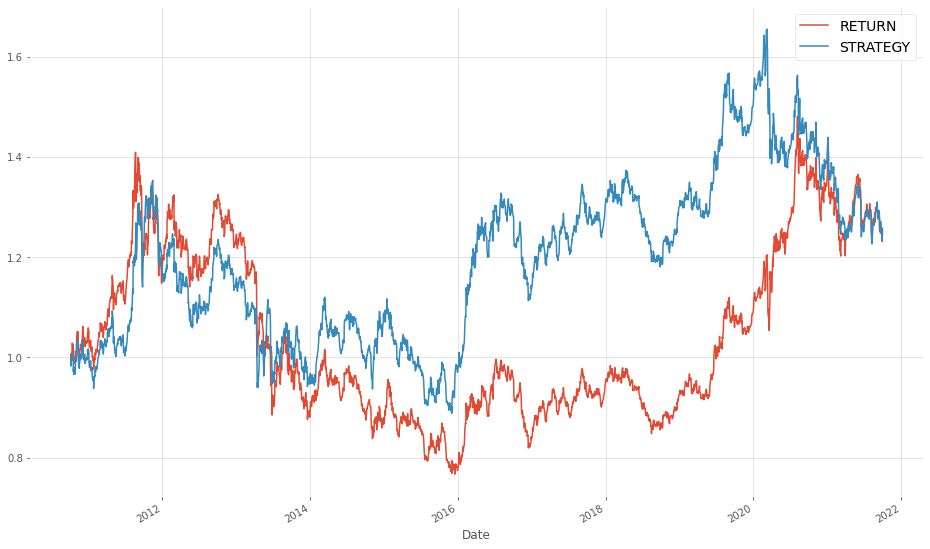

In [117]:
GOLD[["RETURN", "STRATEGY"]].cumsum().apply(np.exp).plot(figsize = (16, 10)
                                                         )

<AxesSubplot:xlabel='Date'>

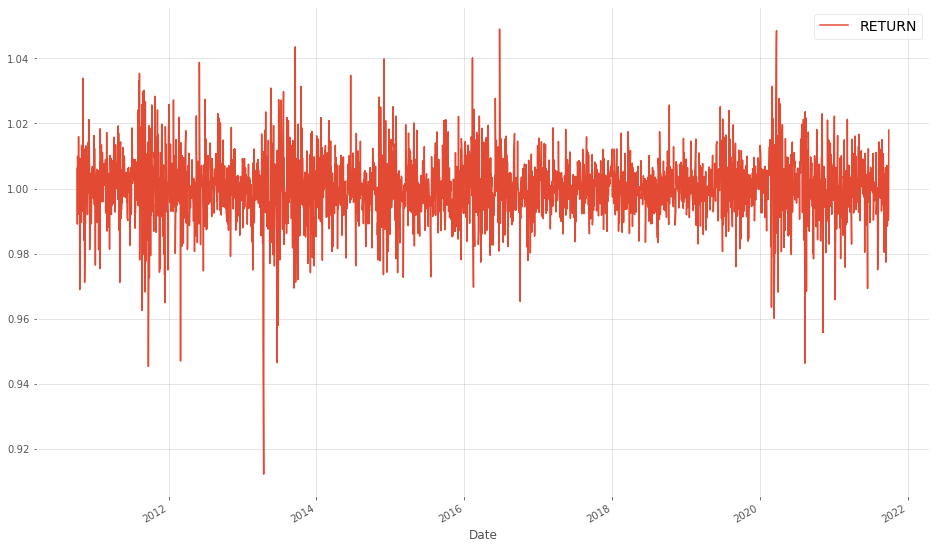

In [118]:
GOLD[["RETURN"]].apply(np.exp).plot(figsize = (16, 10)
                                                         )

In [119]:
GOLD["RETURN"] = np.log(GOLD["Close"] / GOLD["Close"].shift(1)
                        )

In [120]:
lags = 5

cols = []

for lag in range(1, lags +1):
    col = "lag_{}".format(lag)
    GOLD[col] = GOLD["RETURN"].shift(lag)
    cols.append(col)
    
GOLD.dropna(inplace = True)

In [121]:
M.fit(GOLD[cols], np.sign(GOLD["RETURN"]
                         )
     )

LogisticRegression(C=10000000.0, max_iter=10000)

In [122]:
GOLD["PREDICTION"] = M.predict(GOLD[cols]
                              )

In [123]:
GOLD["PREDICTION"].value_counts()

1.000     2490
-1.000     270
Name: PREDICTION, dtype: int64

In [134]:
accuracy = np.sign(GOLD["RETURN"].iloc[lags:] *
                   GOLD["PREDICTION"].iloc[lags:]
                  ).value_counts()

accuracy

1.000     1427
-1.000    1317
0.000       11
dtype: int64

<AxesSubplot:xlabel='Date'>

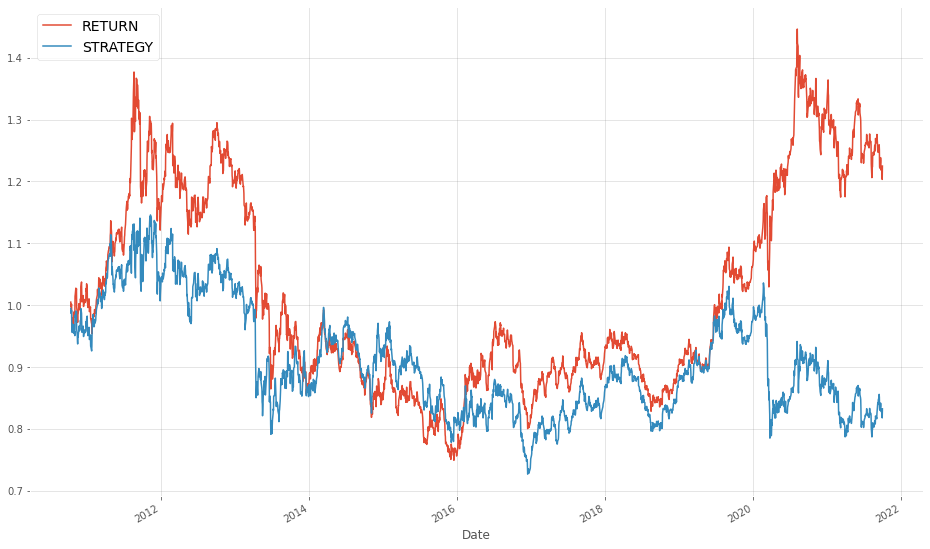

In [135]:
GOLD["STRATEGY"] = GOLD["PREDICTION"] * GOLD["RETURN"]

GOLD[["RETURN", "STRATEGY"]].sum().apply(np.exp)

GOLD[["RETURN", "STRATEGY"]].cumsum().apply(np.exp).plot(figsize = (16,10)
                                                        )

In [136]:
GOLD[["RETURN", "STRATEGY"]].sum().apply(np.exp)

RETURN     1.225
STRATEGY   0.833
dtype: float64